# Movie Rating Prediction With Python


# Problem Statement

1.Build a model that predicts the rating of a movie based on genre, director, and actors. You can use regression techniques to tackle this problem.

2.The goal is to analyze historical movie data and develop a model that accurately estimates the rating given to a movie by users or critics.

3.Movie rating prediction project enables you to explore data analysis, preprocessing, feature engineering and machine learning modeling techniques.It provides insights into the factors that infulence movie ratings and allows you to build a model that can estimate the ratings of movie accurately.


In [1]:
# Importing the libraries

import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor

In [2]:
# loading the datasets 
movies_data=pd.read_csv('movies.dat', sep='::',engine='python',encoding='latin-1',names=['Movieid','Title','Genres'])
movies_data.head()

,Movieid,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
movies_data.shape

(3883, 3)

In [4]:
users_data=pd.read_csv('users.dat', sep='::', engine='python', encoding='latin-1',names=['Userid','Gender','Age','Occupation','Zipcode'])
users_data.head()

,Userid,Gender,Age,Occupation,Zipcode
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [5]:
users_data.shape

(6040, 5)

In [6]:
ratings_data=pd.read_csv('ratings.dat', sep='::',engine='python',encoding='latin-1',names=['Userid','Movieid','Ratings','Timestamp'])
ratings_data.head()

,Userid,Movieid,Ratings,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [7]:
ratings_data.shape

(1000209, 4)

In [8]:
# merging movie data with respect to ratings data

ratings_data=movies_data.merge(ratings_data,on='Movieid',how='inner')
ratings_data.head()

,Movieid,Title,Genres,Userid,Ratings,Timestamp
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474


In [9]:
# merging the ratings data with respect to users data and creating new data set

main_data=ratings_data.merge(users_data,on='Userid',how='inner')
main_data.head()

,Movieid,Title,Genres,Userid,Ratings,Timestamp,Gender,Age,Occupation,Zipcode
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067


In [10]:
main_data.shape

(1000209, 10)

In [11]:
main_data.isnull().sum() # checking for null values

Movieid       0
Title         0
Genres        0
Userid        0
Ratings       0
Timestamp     0
Gender        0
Age           0
Occupation    0
Zipcode       0
dtype: int64

In [12]:
main_data.info() # checking the information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Movieid     1000209 non-null  int64 
 1   Title       1000209 non-null  object
 2   Genres      1000209 non-null  object
 3   Userid      1000209 non-null  int64 
 4   Ratings     1000209 non-null  int64 
 5   Timestamp   1000209 non-null  int64 
 6   Gender      1000209 non-null  object
 7   Age         1000209 non-null  int64 
 8   Occupation  1000209 non-null  int64 
 9   Zipcode     1000209 non-null  object
dtypes: int64(6), object(4)
memory usage: 76.3+ MB


In [13]:
main_data['Age'].value_counts()

Age
25    395556
35    199003
18    183536
45     83633
50     72490
56     38780
1      27211
Name: count, dtype: int64

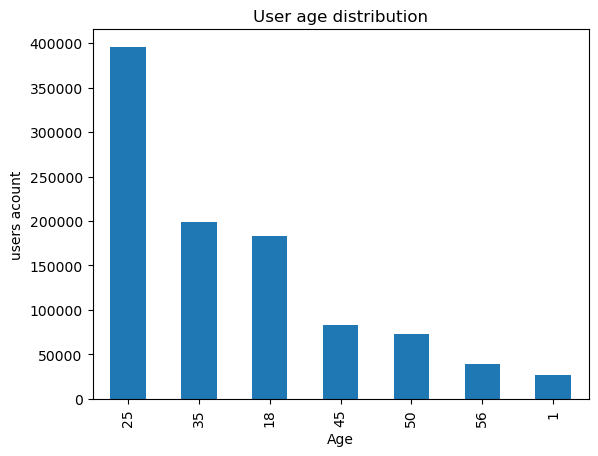

In [14]:
# visual representation 

main_data['Age'].value_counts().plot(kind='bar')
plt.title('User age distribution')
plt.xlabel('Age')
plt.ylabel('users acount')
plt.show()

In [15]:
# user ratings for a movies 

movie_rating=main_data[main_data['Title'].str.contains('Jumanji')]
movie_rating

,Movieid,Title,Genres,Userid,Ratings,Timestamp,Gender,Age,Occupation,Zipcode
370,2,Jumanji (1995),Adventure|Children's|Fantasy,10,5,979168267,F,35,1,95370
771,2,Jumanji (1995),Adventure|Children's|Fantasy,18,2,978152541,F,18,3,95825
1353,2,Jumanji (1995),Adventure|Children's|Fantasy,23,2,978461604,M,35,0,90049
2779,2,Jumanji (1995),Adventure|Children's|Fantasy,44,4,1004410663,M,45,17,98052
3269,2,Jumanji (1995),Adventure|Children's|Fantasy,48,3,978064964,M,25,4,92107
...,...,...,...,...,...,...,...,...,...,...
630524,2,Jumanji (1995),Adventure|Children's|Fantasy,5956,2,957079525,F,18,4,02142
630817,2,Jumanji (1995),Adventure|Children's|Fantasy,5961,4,957022911,F,45,0,78757
631125,2,Jumanji (1995),Adventure|Children's|Fantasy,6001,3,956805460,F,25,7,94117
631359,2,Jumanji (1995),Adventure|Children's|Fantasy,6019,4,956761170,M,25,0,10024


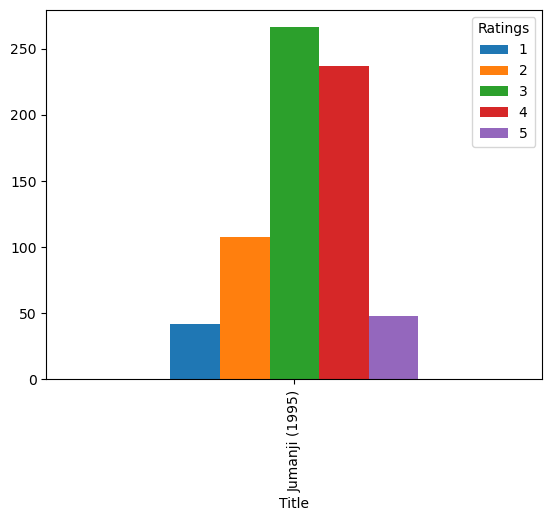

In [16]:
# visual representation

movie_rating.groupby(['Title','Ratings']).size().unstack().plot(kind='bar',stacked=False, legend=True)
plt.show()

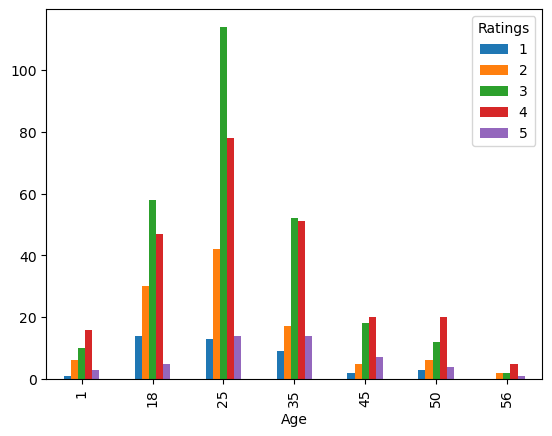

In [17]:
movie_rating.groupby(['Age','Ratings']).size().unstack().plot(kind='bar',stacked=False, legend=True)
plt.show()

In [18]:
main_data.head()

,Movieid,Title,Genres,Userid,Ratings,Timestamp,Gender,Age,Occupation,Zipcode
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067


In [19]:
main_data.to_csv('main_data.csv', index=False)

In [20]:
df=pd.read_csv('main_data.csv')
df.head()


,Movieid,Title,Genres,Userid,Ratings,Timestamp,Gender,Age,Occupation,Zipcode
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067


In [21]:
df.shape

(1000209, 10)

In [22]:
# Splitting the data into features and Targets

X=df.drop(columns=['Title','Genres','Timestamp','Gender','Zipcode','Ratings'],axis=True)

In [23]:
Y=df['Ratings']

In [24]:
print(X)

         Movieid  Userid  Age  Occupation
0              1       1    1          10
1             48       1    1          10
2            150       1    1          10
3            260       1    1          10
4            527       1    1          10
...          ...     ...  ...         ...
1000204     3513    5727   25           4
1000205     3535    5727   25           4
1000206     3536    5727   25           4
1000207     3555    5727   25           4
1000208     3578    5727   25           4

[1000209 rows x 4 columns]


In [25]:
print(Y)

0          5
1          5
2          5
3          4
4          5
          ..
1000204    4
1000205    2
1000206    5
1000207    3
1000208    5
Name: Ratings, Length: 1000209, dtype: int64


In [26]:
# spliting the data into test and training sets

X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.2, random_state=2)

In [27]:
print(X.shape,X_train.shape,X_test.shape)

(1000209, 4) (800167, 4) (200042, 4)


In [28]:
# Logistic Regression model training 

model=LogisticRegression()

In [29]:
# Training the model 

model.fit(X_train, Y_train)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Evaluation

In [30]:
# Accuracy on trainig data 
X_train_prediction=model.predict(X_train)

In [31]:
print(X_train_prediction)

[4 4 4 ... 4 4 4]


In [32]:
training_data_accuracy=accuracy_score(Y_train,X_train_prediction)

print('Accuracy on training data :', training_data_accuracy)

Accuracy on training data : 0.34881093571716904


In [33]:
# Accuracy on test data 
Y_test_prediction=model.predict(X_test)

In [34]:
print(Y_test_prediction)

[4 4 4 ... 4 4 4]


In [35]:
testing_data_accuracy = accuracy_score(Y_test, Y_test_prediction)

print('Accuracy on testing data :', testing_data_accuracy)

Accuracy on testing data : 0.3489017306365663


In [ ]:
# Using Random ForestRegressor model

model_2=RandomForestRegressor(n_estimators=100)
model_2.fit(X_train, Y_train)

In [ ]:
model_test_prediction=model_2.predict(X_test)

In [ ]:
model_2.score(X_train,Y_train)

In [ ]:
accuracy_random_forest = round(model_2.score(X_train, Y_train) * 100, 2)

In [ ]:
accuracy_random_forest